In [25]:
# Import base packages
import os
import numpy as np
import pandas as pd
import ast

# Import Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [2]:
# Set up image folder locations
currdir = os.getcwd()
parentdir = os.path.abspath(os.path.join(currdir, os.pardir))
datadir = os.path.join(parentdir, 'data')
rawdir = os.path.join(datadir, 'raw')
traindir = os.path.join(rawdir, 'train')

In [3]:
# Number of Images
print(len(os.listdir(traindir)))

3422


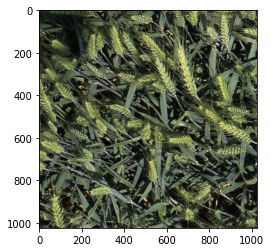

In [4]:
# Open a sample image
img = Image.open(os.path.join(traindir, '0a3cb453f.jpg'))
plt.imshow(img)

In [5]:
# Read in the train.csv to understand it
df = pd.read_csv(os.path.join(rawdir, 'train.csv'))
display(df.shape, df.head(25))


(147793, 5)

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1
5,b6ab77fd7,1024,1024,"[569.0, 382.0, 119.0, 111.0]",usask_1
6,b6ab77fd7,1024,1024,"[52.0, 602.0, 82.0, 45.0]",usask_1
7,b6ab77fd7,1024,1024,"[627.0, 302.0, 122.0, 75.0]",usask_1
8,b6ab77fd7,1024,1024,"[412.0, 367.0, 68.0, 82.0]",usask_1
9,b6ab77fd7,1024,1024,"[953.0, 220.0, 56.0, 103.0]",usask_1


In [33]:
# Make sure all images are the same width and height
display(df['width'].mean())
display(df['height'].mean())

1024.0

1024.0

In [34]:
# How many different sources do we get data from?
df['source'].unique()

array(['usask_1', 'arvalis_1', 'inrae_1', 'ethz_1', 'arvalis_3', 'rres_1',
       'arvalis_2'], dtype=object)

In [28]:
# Convert the string in the bounding box to a list that can be iterated over
ast.literal_eval(df['bbox'][0])

[834.0, 222.0, 56.0, 36.0]